# A Tutorial of Implementing FDM for Laplace equation

## Laplace's equation
Consider the Laplace equation
$$
    \nabla^2 u = 0, \qquad (x, y) \in \Omega
$$
with the Dirichlet boundary conditions

## 5-points Laplacian FDM for the Laplace equation

### The grid
We start from the uniform gird $(x_i, y_j)$, where
$$ 
    x_i = i\Delta x, \quad\text{for } i = 0, 1, \ldots, N+1,\qquad\text{and } \Delta x = \frac{1}{N+1}
$$
and
$$
    y_i = j\Delta y, \quad\text{for } j = 0, 1, \ldots, M+1,\qquad\text{and } \Delta y = \frac{1}{M+1}
$$

**5-points Laplacian**
$$
    \lambda^2u_{i-1,j} + \lambda^2 u_{i+1,j} + u_{i,j-1} + u_{i,j+1} - 2(1+\lambda^2)u_{i,j} = 0,
$$
where $\lambda = \frac{\Delta y}{\Delta x}$.

**Dirichlet BC**
* $x = 0$: $u_{0,j} = g_L(y_j),\,\text{for } j = 0,\ldots,M+1$, 
* $x = 1$: $u_{N+1,j} = g_R(y_j),\,\text{for } j = 0,\ldots,M+1$, 
* $y = 0$: $u_{i,0} = g_B(x_i),\,\text{for } i = 0,\ldots,N+1$, 
* $y = 1$: $u_{i,M+1} = g_T(x_i),\,\text{for } i = 0,\ldots,N+1$.

### Build the matrix (discrete linear system)

* We need to assemble the above $NM$ linear equations into a linear system $AU = F$

* $A$ is $NM \times NM$ matrix, and $U$ is the vector of all unknowns

* Before assembling the matrix $A$, we need to order the unknowns $u_{i,j}$ to construct the vector. Here, we use the rowwise ordering
$$
    U = [u_{1,1}, \ldots, u_{N,1},u_{1,2},\ldots,u_{N,2},\ldots, u_{1,M},\ldots, u_{N,M}]^T.
$$

* The relation between $U_\ell$ with $u_{i,j}$:
$$
    U_\ell = u_{i,j}\qquad \ell = (j-1)N + i
$$

Then, the 5-points Laplacian becomes
$$
    \lambda^2 U_{\ell-1} + \lambda^2 U_{\ell+1} + U_{\ell-N} + U_{\ell+N} - 2(1+\lambda^2)U_{\ell} = 0, \qquad \text{for } \ell = 1, \ldots, NM. 
$$

**Assemble the matrix A**

In general, the matrix $A$ has the structure as follows:
$$
A = \begin{bmatrix}T & D \\ D & T & D \\ & & \ddots & \ddots &\ddots \\ & & & D & T & D \\ &&&& D & T\end{bmatrix},
$$

where $D$ is the idenity matrix $I_N$, and the matrix $T$ is a tridiagonal matrix ($N\times N$)
$$
T = \begin{bmatrix}-2(1+\lambda^2) & \lambda^2 \\ \lambda^2 & -2(1+\lambda^2) & \lambda^2 \\ & & \ddots & \ddots &\ddots \\ & & & \lambda^2 & -2(1+\lambda^2) & \lambda^2 \\ &&&& \lambda^2 & -2(1+\lambda^2)\end{bmatrix}.
$$

* Generate matrices $T$ and $D$:

In [1]:
import numpy as np

In [2]:
def generate_TD(N, dx, dy):
    T = np.zeros([N,N])
    D = np.zeros([N,N])
    a = (dy/dx)**2
    for i in range(N):
        T[i,i] = -2*(1+a)
        D[i,i] = 1
        if (i < N-1):
            T[i,i+1] = a
        if (i > 0):
            T[i,i-1] = a
    return T, D

* Assemble the matrix $A$ with $T$ and $D$

In [3]:
def assemble_A(N, M, dx, dy):
    T, D = generate_TD(N, dx, dy)
    A = np.zeros([N*M, N*M])
    for j in range(M):
        A[j*N:(j+1)*N, j*N:(j+1)*N] = T
        if (j < M-1):
            A[j*N:(j+1)*N, (j+1)*N:(j+2)*N] = D
        if (j > 0):
            A[j*N:(j+1)*N, (j-1)*N:(j)*N] = D
    return A

In [10]:
N = 4
M = 4
dx = 1./(N+1)
dy = 1./(M+1)
T, D = generate_TD(N, dx, dy)
print (T)
print (D)

[[-4.  1.  0.  0.]
 [ 1. -4.  1.  0.]
 [ 0.  1. -4.  1.]
 [ 0.  0.  1. -4.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [11]:
A = assemble_A(N, M, dx, dy)
print (A)

[[-4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0. -4.  1.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0. -4.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4. 

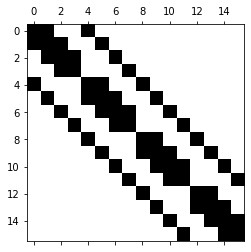

In [12]:
import matplotlib.pyplot as plt

plt.spy(A)
plt.show()

**Assemble the vector F**

* Most entries of $F$ are zeros
* If $U_\ell$ is next to boundaries, then $F_\ell$ need to be modified according to the boundary conditions

* Left boundary $g_L$: $F_{1,j} += -\lambda^2 g_L(y_j)$ for $j = 1, \ldots, M$ 

* Right boundary $g_R$:
* Bottom boundary $g_B$:
* Top bounday $g_T$:

In [14]:
def gL(y):
    return 1.

def gR(y):
    return 0.

def gB(x):
    return 0.

def gT(x):
    return 0.


In [15]:
def assemble_F(x, y, dx, dy, N, M, gL, gR, gB, gT):
    F = np.zeros(N*M)
    
    a = (dy/dx)**2
    # left BCs
    for j in range(M):
        F[j*N] += -a*gL(y[j+1])
        
    # right BCs
    
    # bottom BCs
    
    # top BCs
    
    return F 

In [22]:
def Laplace_solver(N, M, gL, gR, gB, gT):
    dx = 1./(N+1)
    dy = 1./(M+1)
    x = np.linspace(0, 1, N+2)
    y = np.linspace(0, 1, M+2)
    
    A = assemble_A(N, M, dx, dy)
    
    F = assemble_F(x, y, dx, dy, N, M, gL, gR, gB, gT)
    
    U = np.linalg.solve(A, F)
    
    u = np.reshape(U, (N,M))
    
    X, Y = np.meshgrid(x[1:N+1], y[1:M+1])
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    
    ax.plot_surface(X, Y, u)
    plt.show()
    print (u)

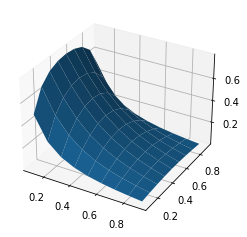

[[0.48892501 0.2809096  0.17883715 0.12034379 0.0828866  0.05699881
  0.03802735 0.02330652 0.01107499]
 [0.67479043 0.45587625 0.31409522 0.21965141 0.15420382 0.10708127
  0.07180408 0.04412375 0.02099344]
 [0.75436048 0.55370976 0.40201605 0.2899628  0.207196   0.14531836
  0.09798395 0.06039095 0.02877502]
 [0.78894171 0.60258625 0.45029644 0.33098776 0.239299   0.16901224
  0.1144224  0.07068108 0.03371569]
 [0.79882012 0.61739708 0.46559569 0.3443928  0.25       0.1770092
  0.12001232 0.07419529 0.03540667]
 [0.78894171 0.60258625 0.45029644 0.33098776 0.239299   0.16901224
  0.1144224  0.07068108 0.03371569]
 [0.75436048 0.55370976 0.40201605 0.2899628  0.207196   0.14531836
  0.09798395 0.06039095 0.02877502]
 [0.67479043 0.45587625 0.31409522 0.21965141 0.15420382 0.10708127
  0.07180408 0.04412375 0.02099344]
 [0.48892501 0.2809096  0.17883715 0.12034379 0.0828866  0.05699881
  0.03802735 0.02330652 0.01107499]]


In [23]:
Laplace_solver(9, 9, gL, gR, gB, gT)